In [2]:
# importing all the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 


### Pandas 

### Loading data with pandas

Now we can use the ``read_csv`` command to read the comma-separated-value data.  This command is pretty sophisticated.  It can read data via a URL (Uniform Resource Locator, see Lecture 2).  Not only that, it can load data from a `.zip` file by on the fly decompressing it and opening the first `.csv` it finds.  You can open different `.csv` files in the `.zip` file with additional arguments.  See the [docs](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) for more information.

In [3]:
# reading a csv file using pandas
data = pd.read_csv('http://faculty.washington.edu/dacb/HCEPDB_moldata.zip')

In [ ]:
data.head()

In [4]:
data.set_index('id', inplace=True)

### Manipulating data with Pandas 

In [5]:
data['mass_ratio_H2O'] = data['mass'] / 18.01528

In [ ]:
data.head()

### Data Visualization

In [6]:
df = data.sample(500, random_state=200)

In [ ]:
df.shape

#### Scatter Plots 

In [ ]:
# plotting with python 
plt.scatter(df['jsc'], df['voc'])
#asthetics
plt.xlabel('Jsc')
plt.ylabel('VOC')
plt.title('VOC vs Jsc')
#Show the plot
plt.show()



In [ ]:
#changing the color of the markers
plt.scatter(df['jsc'], df['voc'], color='red')
plt.xlabel('Jsc')
plt.ylabel('VOC')
plt.title('VOC vs Jsc')

In [ ]:
# changing marker type and size
plt.scatter(df['jsc'], df['voc'], color='green', marker='s', s=20)
plt.xlabel('Jsc')
plt.ylabel('VOC')
plt.title('VOC vs Jsc')

#### Subplots

In [ ]:
# Plotting two types of data points in the same subplot
small_mass = df[df['mass'] < 500] # data has mass less than 300
large_mass = df[df['mass'] >= 500] # data has mass greater than 300

fig, ax = plt.subplots()

# plot the different data groups as different colors
ax.scatter(small_mass['jsc'], small_mass['voc'], color='green', label='mass < 500')
ax.scatter(large_mass['jsc'], large_mass['voc'], color='blue', label='mass >= 500')

ax.set_xlabel('Jsc')
ax.set_ylabel('VOC')
ax.set_title('VOC vs Jsc')
plt.legend() # add a legend

In [ ]:
# subplots with 2 plots in two rows
fig, axes = plt.subplots(2,1, figsize=(5,10), sharex=True)

print(axes) # axes is now an array of axes objects instead of just one

# first plot
axes[0].scatter(df['jsc'], df['voc'])
axes[0].set_xlabel('Jsc')
axes[0].set_ylabel('VOC')

# second plot
axes[1].scatter(df['jsc'], df['mass'])
axes[1].set_xlabel('Jsc')
axes[1].set_ylabel('Mass')

#### Line Plot

In [ ]:
# plotting with python 
plt.plot(df['mass'], df['pce'])
#asthetics
plt.xlabel('mass')
plt.ylabel('pce')
plt.title('pce vs mass')
#Show the plot
plt.show()

#### Bar Plot

In [ ]:
df['has silicon'] = df['SMILES_str'].apply(lambda s: 'Si' in s) # add a column that indicates if the material is silicon based

In [ ]:
df2 = df.groupby('has silicon').mean(numeric_only = 'True').reset_index()

In [ ]:
df2

In [ ]:
#plotting using pandas
df2.plot(kind='bar', x='has silicon', y='jsc')

In [ ]:
#plotting two columns in one bar plot
df2.iloc[:,[0,2,3]].plot(kind='bar', x='has silicon')

In [ ]:
# ploting using matplotlib (stacked bar plots)
fig = plt.figure(figsize = (5, 5))
plt.bar(df2['has silicon'], df2['pce'], width = 0.4, label ='pce', color = 'grey')
plt.bar(df2['has silicon'], df2['voc'], width = 0.4, label ='voc', color = 'orange')
plt.xlabel('Has Silicon', fontweight ='bold', fontsize = 10)
plt.ylabel('pce', fontweight ='bold', fontsize = 10)
plt.legend()

In [ ]:
# ploting using matplotlib (unstacked bar plot with multiple columns)

fig, ax = plt.subplots(layout='constrained')
offset = 0.4
ax.bar(df2['has silicon'], df2['pce'], width = 0.4, label ='pce', color = 'grey')
ax.bar(df2['has silicon'] + offset, df2['voc'], width = 0.4, label ='voc', color = 'orange')
ax.set_xlabel('Has Silicon', fontweight ='bold', fontsize = 10)
ax.set_ylabel('pce', fontweight ='bold', fontsize = 10)
ax.legend()

#### Histogram

In [ ]:
#ploting using pandas
df.plot(kind='hist', y='mass')

In [ ]:
#ploting using matplotlib
plt.hist(df['mass'], label ='mass')
plt.xlabel('mass', fontweight ='bold', fontsize = 10)
plt.ylabel('Frequency', fontweight ='bold', fontsize = 10)
plt.legend()

#### Box and Whisker Plot

In [ ]:
#ploting using pandas
df.plot(kind='box', y=['mass', 'jsc'])

In [ ]:
#plotting using matplotlib
df.boxplot(column=['mass', 'jsc'], color='blue', figsize=(10, 6))


#### Pie Chart

In [ ]:
#plotting using pandas
df.groupby('has silicon').count().plot(kind='pie', y = 'pce')

In [ ]:
#plotting using matplotlib
df3 = df.groupby('has silicon').count()
plt.pie(df3['pce'], labels = df3.index)
plt.ylabel('pce')
plt.legend()

#### Density Estimate

<Axes: ylabel='Density'>

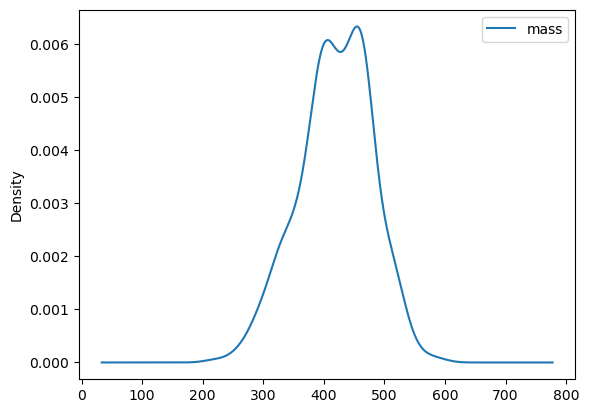

In [7]:
df.plot(kind='kde', y='mass')

#### Density Estimate

In [1]:
#plotting using pandas

df.plot(kind='kde', y='mass')

NameError: name 'df' is not defined

#### Make a density plot of both e-homo-alpha and e-lumo-alpha on the same plot

### Seaborn

In [ ]:
import seaborn as sns


In [ ]:
sns.kdeplot(df['mass'])

In [ ]:
sns.relplot(kind = 'scatter', data = df, x="jsc", y="voc")

In [ ]:
sns.displot(kind='hist', data = df, x ='mass')

##### Faster aggregation, color, and style encodings for basic plot types

In [ ]:
df['LUMO - HOMO'] = df['e_lumo_alpha'] - df['e_homo_alpha']

In [ ]:
df['mass bin'] = pd.cut(df['mass'], 5)


In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
sns.kdeplot(data=df, x='LUMO - HOMO', hue='mass bin', common_norm=False, palette='viridis')